In [1]:
import albumentations as A
import cv2
from PIL import Image
import matplotlib.pyplot as plt

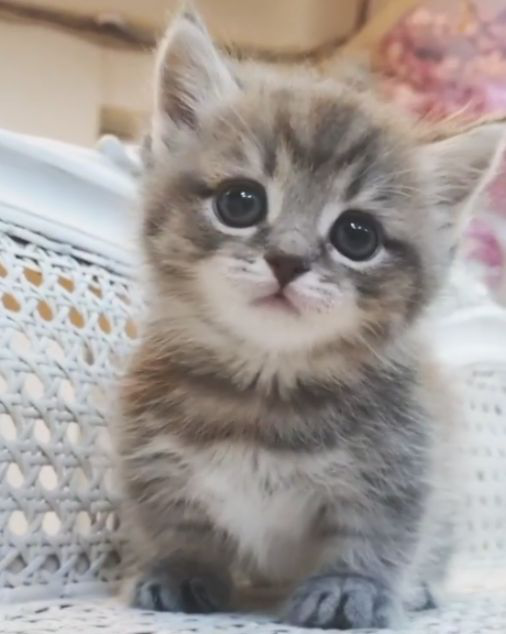

In [2]:
im = Image.open("test.jpg")
display(im)

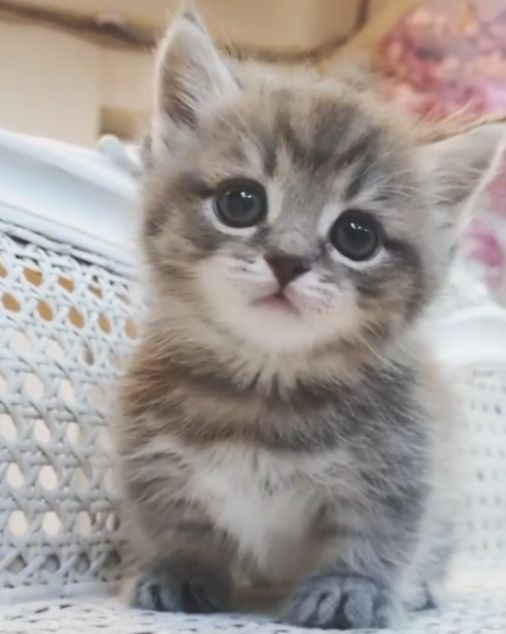

In [3]:
im = cv2.cvtColor(cv2.imread("test.jpg"), cv2.COLOR_BGR2RGB)
display(Image.fromarray(im))

# RandomCrop

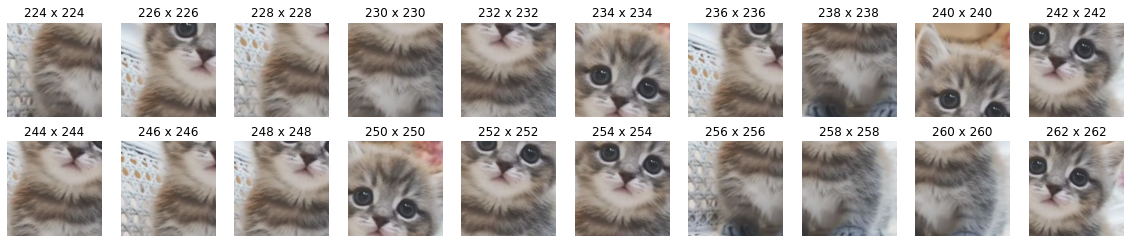

In [4]:
height, width = 224, 224
plt.figure(figsize=(20,4))
display_ims = 20

for i in range(display_ims):   
    tfs = A.Compose([A.RandomCrop(height = height + (i * 2), width = width + (i * 2))])
    tfs_im = tfs(image=im)
    plt.subplot(2, display_ims // 2, i+1)
    plt.imshow(tfs_im["image"])
    plt.axis("off")
    plt.title(f"{height + (i * 2)} x {width + (i * 2)}")
plt.savefig('pngs/random_crop.png', dpi=400)

# Advanced Blur

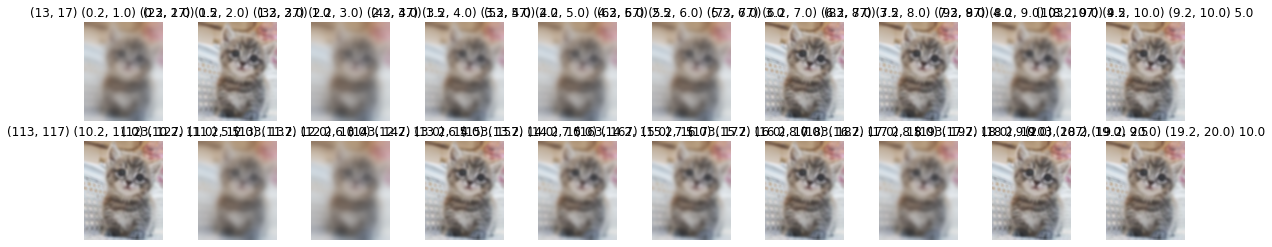

In [5]:
plt.figure(figsize=(20,4))
display_ims = 20
blur_limit = (3, 7)
sigmaX_limit = (0.2, 1.0)
sigmaY_limit = (0.2, 1.0)
rotate_limit = 90
beta_limit = (0.5, 8.0)
noise_limit = (0.9, 1.1) 
p, i = 0.5, 10

tfs = A.Compose([A.AdvancedBlur(
                                    blur_limit = (blur_limit[0] + 10 * (i+1), blur_limit[1] + 10 * (i+1)),
                                    sigmaX_limit = (sigmaX_limit[0] + i, sigmaX_limit[1] + i),
                                    sigmaY_limit = (sigmaY_limit[0] + i, sigmaY_limit[1] + i),
                                    rotate_limit = rotate_limit + 100 * i,
                                    beta_limit = beta_limit,
                                    noise_limit = noise_limit,
                                    always_apply = True,
                                    p = p * (i+1)
                                    )])

for i in range(display_ims):   
    tfs_im = tfs(image=im)
    plt.subplot(2, display_ims // 2, i+1)
    plt.imshow(tfs_im["image"])
    plt.axis("off")
    plt.title(f"{(blur_limit[0] + 10 * (i+1), blur_limit[1] + 10 * (i+1))} {(sigmaX_limit[0] + i, sigmaX_limit[1] + i)} {(sigmaY_limit[0] + i, sigmaY_limit[1] + i)} {(p * (i + 1))}")
plt.savefig('pngs/advanced_blur.png', dpi=400)

# Blur

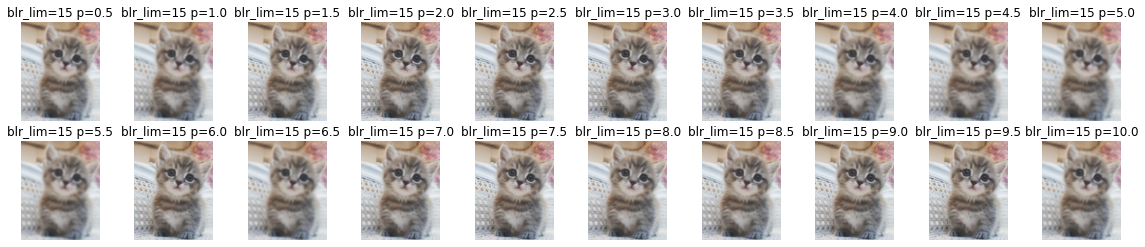

In [6]:
plt.figure(figsize=(20,4))
display_ims = 20
blur_limit = 2
p, i = 0.5, 10

for i in range(display_ims):   
    tfs = A.Compose([A.Blur(blur_limit = (blur_limit + 1) * 5,
                            always_apply=True, p = (p * (i + 1)))])
    tfs_im = tfs(image=im)
    plt.subplot(2, display_ims // 2, i+1)
    plt.imshow(tfs_im["image"])
    plt.axis("off")
    plt.title(f"blr_lim={(blur_limit + 1) * 5} p={(p * (i + 1))}")
plt.savefig('pngs/blur.png', dpi=400)

# CLAHE

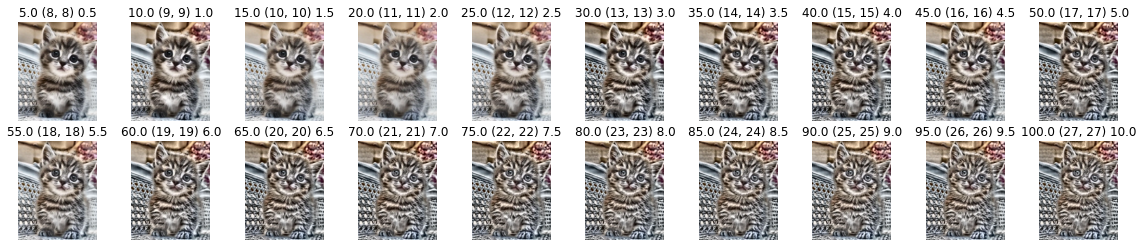

In [7]:
plt.figure(figsize=(20,4))
display_ims = 20
clip_limit = 1.0
tile_grid_size = (8, 8) 
p, i = 0.5, 10

for i in range(display_ims):   
    tfs = A.Compose([A.CLAHE(clip_limit = (clip_limit + i) * 5,
                             tile_grid_size = (tile_grid_size[0] + i, tile_grid_size[1] + i),
                             always_apply=True, p = (p * (i + 1)))])
    tfs_im = tfs(image=im)
    plt.subplot(2, display_ims // 2, i+1)
    plt.imshow(tfs_im["image"])
    plt.axis("off")
    plt.title(f"{(clip_limit + i) * 5} {(tile_grid_size[0] + i, tile_grid_size[1] + i)} {(p * (i + 1))}")
plt.savefig('pngs/clahe.png', dpi=400)

# Channel Dropout

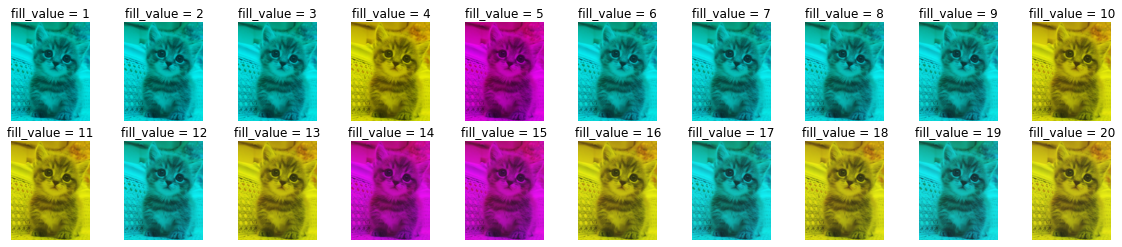

In [8]:
plt.figure(figsize=(20,4))
display_ims = 20
fill_value = 0 
p, i = 0.5, 10

for i in range(display_ims):   
    tfs = A.Compose([A.ChannelDropout(channel_drop_range = (1, 1),
                                      fill_value = fill_value + i + 1,
                                      always_apply=True, p = (p * (i + 1)))])
    tfs_im = tfs(image=im)
    plt.subplot(2, display_ims // 2, i+1)
    plt.imshow(tfs_im["image"])
    plt.axis("off")
    plt.title(f"fill_value = {fill_value + i + 1}")
plt.savefig('pngs/channel_dropout.png', dpi=400)

# Channel Shuffle

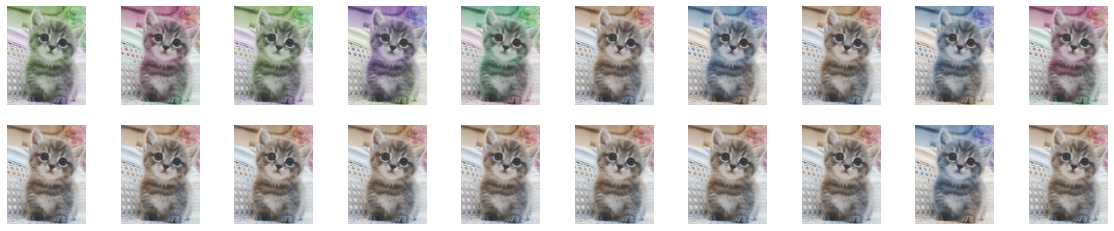

In [9]:
plt.figure(figsize=(20,4))

for i in range(display_ims):   
    tfs = A.Compose([A.ChannelShuffle()])
    tfs_im = tfs(image=im)
    plt.subplot(2, display_ims // 2, i+1)
    plt.imshow(tfs_im["image"])
    plt.axis("off")
plt.savefig('pngs/channel_shuffle.png', dpi=400)

# Collor Jitter

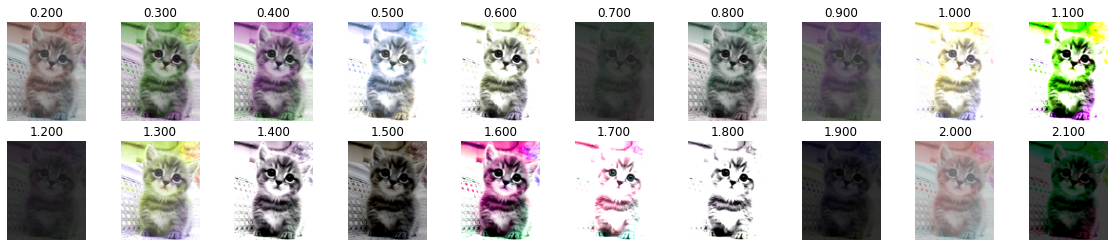

In [10]:
plt.figure(figsize=(20,4))
display_ims = 20
brigtness = 0.2
contrast = 0.2
saturation = 0.2
hue = 0.2
p = 0.5

for i in range(display_ims):   
    tfs = A.Compose([A.ColorJitter(brightness = brigtness + (i * 0.1),
                                   contrast = contrast + (i * 0.1),
                                   saturation = saturation + (i * 0.1),
                                   hue = hue + (i * 0.1),
                                   always_apply=True, p = (p * (i + 1)))])
    tfs_im = tfs(image=im)
    plt.subplot(2, display_ims // 2, i+1)
    plt.imshow(tfs_im["image"])
    plt.axis("off")
    plt.title(f"{brigtness + (i * 0.1):.3f}")
plt.savefig('pngs/channel_jitter.png', dpi=400)

# Defocus

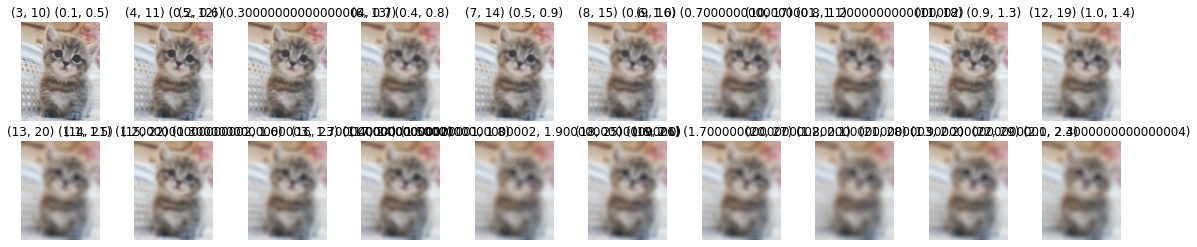

In [11]:
plt.figure(figsize=(20,4))
display_ims = 20
radius = (3, 10)
alias_blur = (0.1, 0.5)
p = 0.5

for i in range(display_ims):   
    tfs = A.Compose([A.Defocus(radius = (radius[0] + i, radius[1] + i),
                               alias_blur = (alias_blur[0] + i * 0.1, alias_blur[1] + i * 0.1),
                               always_apply=True, p = (p * (i + 1)))])
    tfs_im = tfs(image=im)
    plt.subplot(2, display_ims // 2, i+1)
    plt.imshow(tfs_im["image"])
    plt.axis("off")
    plt.title(f"{(radius[0] + i, radius[1] + i)} {(alias_blur[0] + i * 0.1 , alias_blur[1] + i * 0.1)}")
plt.savefig('pngs/defocus.png', dpi=400)

# Downscale

/home/ubuntu/anaconda3/envs/retrieval/lib/python3.10/site-packages/albumentations/augmentations/transforms.py:1587: UserWarning: Using default interpolation INTER_NEAREST, which is sub-optimal.Please specify interpolation mode for downscale and upscale explicitly.For additional information see this PR https://github.com/albumentations-team/albumentations/pull/584
  warnings.warn(


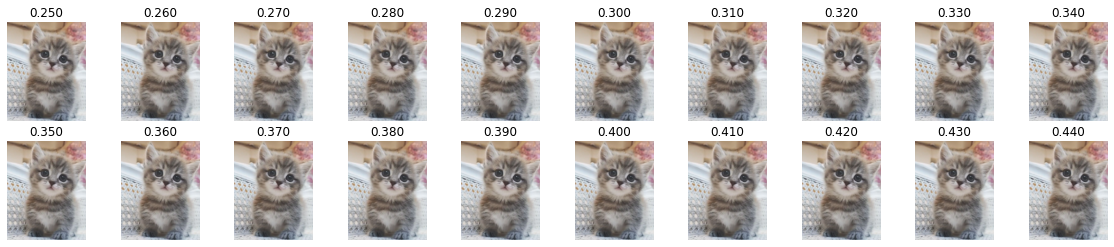

In [12]:
plt.figure(figsize=(20,4))
display_ims = 20
scale_min = 0.25
scale_max = 0.25
p = 0.5

for i in range(display_ims):   
    tfs = A.Compose([A.Downscale(scale_min = scale_min + i * 0.01,
                                 scale_max = scale_max + i * 0.01,
                                 always_apply=False, p = (p * (i + 1)))])
    tfs_im = tfs(image=im)
    plt.subplot(2, display_ims // 2, i+1)
    plt.imshow(tfs_im["image"])
    plt.axis("off")
    plt.title(f"{(scale_min + i * 0.01):.3f}")
plt.savefig('pngs/dowscale.png', dpi=400)

# Emboss

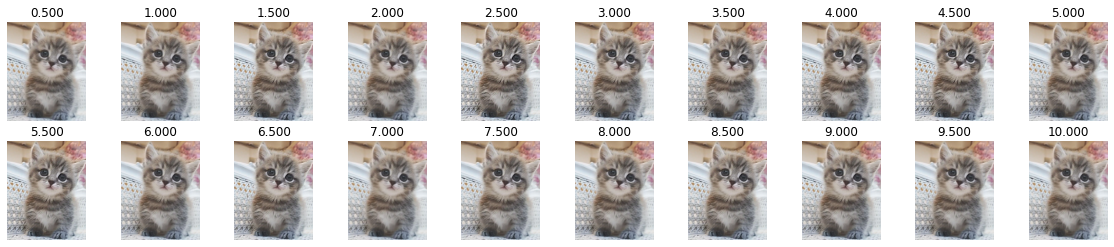

In [13]:
plt.figure(figsize=(20,4))
display_ims = 20
p = 0.5

for i in range(display_ims):   
    tfs = A.Compose([A.Emboss(alpha = (0.1, 1), strength=(0.1, 1),
                              always_apply=False, p = (p * (i + 1)))])
    tfs_im = tfs(image=im)
    plt.subplot(2, display_ims // 2, i+1)
    plt.imshow(tfs_im["image"])
    plt.axis("off")
    plt.title(f"{(p * (i + 1)):.3f}")
plt.savefig('pngs/emboss.png', dpi=400)

# Equalize

In [14]:
plt.figure(figsize=(20,4))
display_ims = 20
p = 0.5

for i in range(display_ims):   
    tfs = A.Compose([A.Equalize(always_apply=False, p = (p * (i + 1)))])
    tfs_im = tfs(image=im)
    plt.subplot(2, display_ims // 2, i+1)
    plt.imshow(tfs_im["image"])
    plt.axis("off")
    plt.title(f"{(p * (i + 1)):.3f}")
plt.savefig('pngs/equalize.png', dpi=400)

# FancyPCA

In [15]:
plt.figure(figsize=(20,4))
display_ims = 20
p = 0.5

for i in range(display_ims):   
    tfs = A.Compose([A.FancyPCA(alpha = 0.1 * i, 
                                always_apply=False, p = (p * (i + 1)))])
    tfs_im = tfs(image=im)
    plt.subplot(2, display_ims // 2, i+1)
    plt.imshow(tfs_im["image"])
    plt.axis("off")
    plt.title(f"a = {(0.1 * i):.2f} p = {(p * (i + 1)):.2f}")
plt.savefig('pngs/fancyPCA.png', dpi=400)

# GaussNoise

In [16]:
plt.figure(figsize=(20,4))
display_ims = 20
var_limit = (0.0, 100.0)
p = 0.5

for i in range(display_ims):   
    tfs = A.Compose([A.GaussNoise(var_limit = (var_limit[0] + i, var_limit[1] + i), 
                                always_apply=True, p = (p * (i + 1)))])
    tfs_im = tfs(image=im)
    plt.subplot(2, display_ims // 2, i+1)
    plt.imshow(tfs_im["image"])
    plt.axis("off")
    plt.title(f"{(var_limit[0] + i, var_limit[1] + i)}")
plt.savefig('pngs/gauss_noise.png', dpi=400)

# HueSaturationValue

In [17]:
plt.figure(figsize=(20,4))
display_ims = 20
hue_shift_limit=20
sat_shift_limit=30
val_shift_limit=20
p = 0.5

for i in range(display_ims):   
    tfs = A.Compose([A.HueSaturationValue(hue_shift_limit = hue_shift_limit + i + 1, 
                                          sat_shift_limit = sat_shift_limit + i + 1,
                                          val_shift_limit = val_shift_limit + i + 1,
                                          always_apply=True, p = (p * (i + 1)))])
    tfs_im = tfs(image=im)
    plt.subplot(2, display_ims // 2, i+1)
    plt.imshow(tfs_im["image"])
    plt.axis("off")
    plt.title(f"{(hue_shift_limit + i + 1)} {sat_shift_limit + i + 1}")
plt.savefig('pngs/hue_saturation_value.png', dpi=400)

# Image Compression

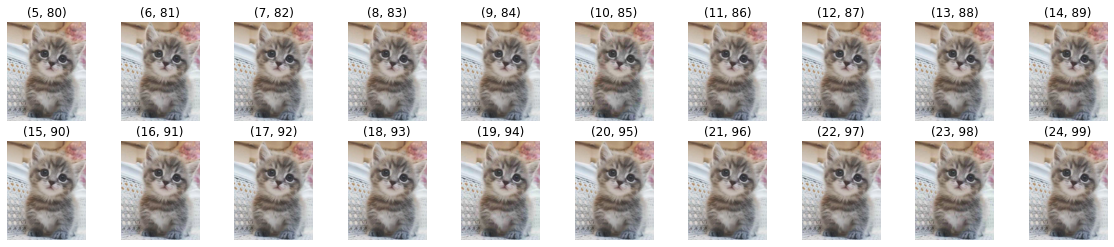

In [18]:
plt.figure(figsize=(20,4))
display_ims = 20
quality_lower = 5
quality_upper = 80
p = 0.5

for i in range(display_ims):   
    tfs = A.Compose([A.ImageCompression(quality_lower = quality_lower + i,
                                        quality_upper = quality_upper + i,
                                        always_apply=True, p = (p * (i + 1)))])
    tfs_im = tfs(image=im)
    plt.subplot(2, display_ims // 2, i+1)
    plt.imshow(tfs_im["image"])
    plt.axis("off")
    plt.title(f"{(quality_lower + i, quality_upper + i)}")
plt.savefig('pngs/image_compression.png', dpi=400)